# Satellite Image Classification

#### Context
Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot

#### The whole dataset has 5631 images with jpg format

In [47]:
#importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [49]:
#Data Preprocessing

In [50]:
#ImageDataGenerator

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# Float or [lower, upper]. Range for random zoom. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,#If None or 0, no rescaling is applied.
    validation_split=0.3)

In [53]:
#creating trainset

In [54]:
#path of the data
data_path='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Satellite Image Classification\\data\\'

In [55]:
train_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 50,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123
)

Found 3942 images belonging to 4 classes.


#### Interpretation : 

The Train Set consists of 3942 Images

In [56]:
valid_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 50,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123
)

Found 1689 images belonging to 4 classes.


#### Interpretation : 

The validation Set consists of 1689 Images

In [ ]:
#sample images

In [72]:
from tensorflow.keras.preprocessing import image_dataset_from_directory 

Found 5631 files belonging to 4 classes.


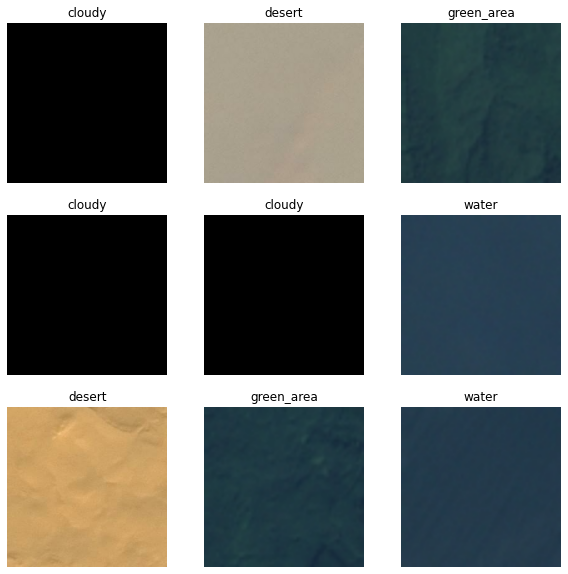

In [73]:
train_dataset = image_dataset_from_directory('D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Sem Preparation\\Satellite Image Classification\\data\\',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [11]:
#Model Building

In [ ]:
#Model 1

In [12]:
from keras.models import Sequential #model
from keras.layers import Conv2D, MaxPooling2D , Dropout, Flatten, Dense , Input , BatchNormalization#layers

In [13]:
model1=Sequential()
model1.add(Conv2D(filters=30, kernel_size=(5,5) ,input_shape=(28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
#model1.add(Dense(64, activation='relu'))
model1.add(Dense(4, activation='softmax'))

In [14]:
#from keras import optimizers

In [15]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
M1=model1.fit(train_set, epochs=100, verbose=1, validation_data=valid_set,shuffle=True)

Epoch 1/100
198/198 [==============================] - 23s 117ms/step - loss: 0.5747 - accuracy: 0.7215 - val_loss: 0.6075 - val_accuracy: 0.6821
Epoch 2/100
198/198 [==============================] - 23s 114ms/step - loss: 0.5687 - accuracy: 0.7301 - val_loss: 0.6227 - val_accuracy: 0.6803
Epoch 3/100
198/198 [==============================] - 23s 115ms/step - loss: 0.5734 - accuracy: 0.7253 - val_loss: 0.6110 - val_accuracy: 0.6832
Epoch 4/100
198/198 [==============================] - 22s 114ms/step - loss: 0.5748 - accuracy: 0.7161 - val_loss: 0.6265 - val_accuracy: 0.6821
Epoch 5/100
198/198 [==============================] - 23s 115ms/step - loss: 0.5736 - accuracy: 0.7154 - val_loss: 0.6237 - val_accuracy: 0.6975
Epoch 6/100
198/198 [==============================] - 22s 110ms/step - loss: 0.5710 - accuracy: 0.7220 - val_loss: 0.6121 - val_accuracy: 0.6767
Epoch 7/100
198/198 [==============================] - 22s 110ms/step - loss: 0.5747 - accuracy: 0.7243 - val_loss: 0.6118 -

In [18]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

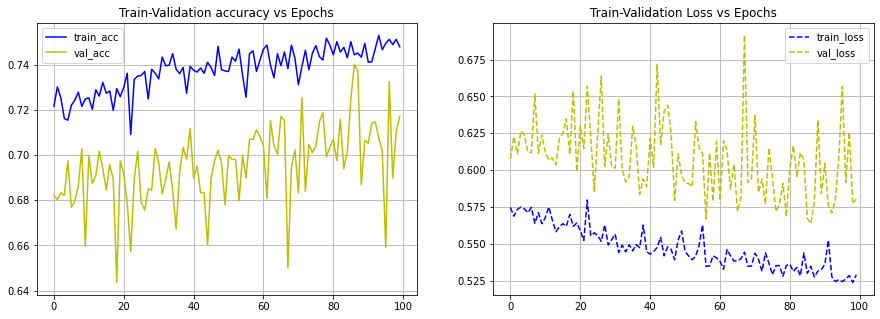

In [19]:
plot_performance(M1)

In [ ]:
#Model 2

In [63]:
model2=Sequential()
model2.add(Conv2D(filters=30, kernel_size=(5,5) ,input_shape=(28,28,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
#model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [64]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
M2=model2.fit(train_set, epochs=100, verbose=1, validation_data=valid_set,shuffle=True)

Epoch 1/100
79/79 [==============================] - 33s 361ms/step - loss: 1.2368 - accuracy: 0.3269 - val_loss: 0.7561 - val_accuracy: 0.5571
Epoch 2/100
79/79 [==============================] - 24s 308ms/step - loss: 0.7640 - accuracy: 0.5591 - val_loss: 0.7595 - val_accuracy: 0.5311
Epoch 3/100
79/79 [==============================] - 19s 245ms/step - loss: 0.7281 - accuracy: 0.5640 - val_loss: 0.7299 - val_accuracy: 0.5731
Epoch 4/100
79/79 [==============================] - 20s 248ms/step - loss: 0.7141 - accuracy: 0.5837 - val_loss: 0.7179 - val_accuracy: 0.5702
Epoch 5/100
79/79 [==============================] - 22s 283ms/step - loss: 0.7048 - accuracy: 0.5788 - val_loss: 0.7216 - val_accuracy: 0.5873
Epoch 6/100
79/79 [==============================] - 27s 343ms/step - loss: 0.6958 - accuracy: 0.5774 - val_loss: 0.7282 - val_accuracy: 0.5909
Epoch 7/100
79/79 [==============================] - 26s 333ms/step - loss: 0.6994 - accuracy: 0.5845 - val_loss: 0.7086 - val_accuracy:

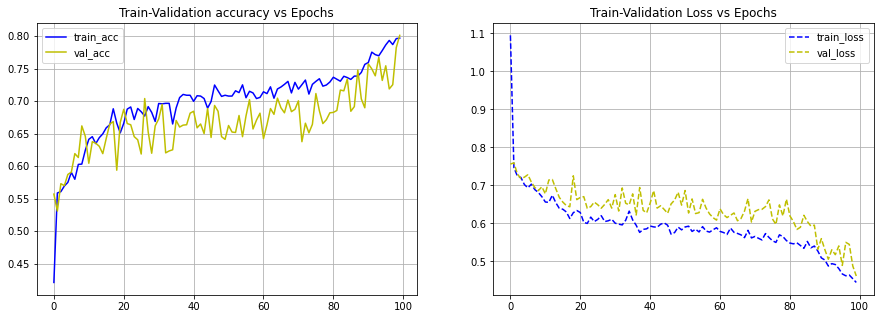

In [66]:
plot_performance(M2)

In [ ]:
#Model 3

In [67]:
model3=Sequential()
model3.add(Conv2D(filters=25, kernel_size=(5,5) ,input_shape=(28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=5, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
#model2.add(Dense(128, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(4, activation='softmax'))

In [68]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
M3=model3.fit(train_set, epochs=100, verbose=1, validation_data=valid_set,shuffle=True)

Epoch 1/100
79/79 [==============================] - 42s 429ms/step - loss: 1.3489 - accuracy: 0.2856 - val_loss: 1.1201 - val_accuracy: 0.4701
Epoch 2/100
79/79 [==============================] - 19s 244ms/step - loss: 1.0753 - accuracy: 0.4709 - val_loss: 0.8389 - val_accuracy: 0.4985
Epoch 3/100
79/79 [==============================] - 20s 249ms/step - loss: 0.7858 - accuracy: 0.5255 - val_loss: 0.7162 - val_accuracy: 0.5802
Epoch 4/100
79/79 [==============================] - 19s 243ms/step - loss: 0.7295 - accuracy: 0.5633 - val_loss: 0.8171 - val_accuracy: 0.5861
Epoch 5/100
79/79 [==============================] - 19s 237ms/step - loss: 0.7182 - accuracy: 0.5745 - val_loss: 0.7302 - val_accuracy: 0.5364
Epoch 6/100
79/79 [==============================] - 19s 237ms/step - loss: 0.7191 - accuracy: 0.5690 - val_loss: 0.7249 - val_accuracy: 0.5873
Epoch 7/100
79/79 [==============================] - 19s 236ms/step - loss: 0.7194 - accuracy: 0.5800 - val_loss: 0.7115 - val_accuracy:

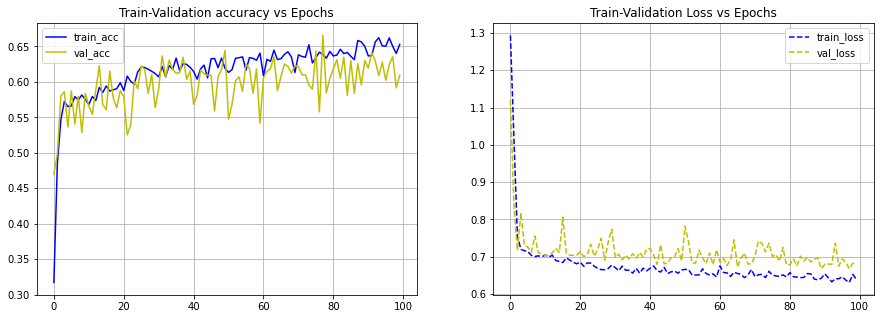

In [70]:
plot_performance(M3)

In [ ]:
#Overall Model 2 is better than model 1 and model 3

In [ ]:
#----------------------------------------------------END--------------------------------------------------------------#